<a href="https://colab.research.google.com/github/FiddiCoder/-FIA-Project/blob/main/ml_pipeline/Movie_Recommender_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [246]:
#@title Import Librerie
import pandas as pd
import numpy as np
import re
from tqdm import tqdm_notebook as tqdm
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import os
import tarfile
from six.moves import urllib
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import datasets, linear_model,tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [247]:
#@title Download e formattazione dataset film

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/FiddiCoder/-FIA-Project/main/"
FILE_PATH = os.path.join("dataset")
FILE_URL1 = DOWNLOAD_ROOT + "dataset/movies2"

def fetch_file_data1(file_url1=FILE_URL1, file_path1=FILE_PATH):
    os.makedirs(file_path1, exist_ok=True)
    csv_path1 = os.path.join(file_path1, "movies2")
    urllib.request.urlretrieve(file_url1, csv_path1)

fetch_file_data1()
datapath = os.path.join("dataset","")

with open('./dataset/movies2', encoding = "ISO-8859-1") as content:
    colonne = ['movie_id', 'movie_title', 'release_date', 'video_release_date', 'imdb_url']
    generi = ['unknown', 'action', 'adventure', 'animation', 'children', 'comedy', 'crime', 'documentary', 'drama', 'fantasy',
          'film-noir',  'horror', 'musical', 'mystery', 'romance', 'sci-fi', 'thriller', 'war', 'western']
    colonneG = colonne + generi
    movies = pd.DataFrame(columns=colonneG)
    i = 0
    for x in content:
        x = x.split("|")
        x[-1] = x[-1][:-1]
        if x[1][-1] == ' ':
            x[1] = x[1][:-1]
        movies.loc[i] = [word if word!='' else "empty" for word in x]
        i = i + 1
movies['movie_id'] = movies['movie_id'].astype('int64')
movies[generi] = movies[generi].astype('category')



In [248]:
#@title Data cleaning: Tabelle con feature inutili
movies = movies.drop('video_release_date', axis=1)
movies = movies.drop('release_date', axis=1)
movies = movies.drop('imdb_url', axis=1)


In [249]:
#@title Inserimento colonna target con relativo riempimento
movies['like'] = 0

for i in range(1600):
  if((i % 3) == 0):
    movies.loc[i, 'like'] = 1
  if((i % 8) == 0):
    movies.loc[i , 'like'] = 2
  if((i % 7) == 0):
     movies.loc[i , 'like'] = 3
  if((i % 5) == 0):
    movies.loc[i , 'like'] = 4
  if((i % 6) == 0):
    movies.loc[i , 'like'] = 5


movies.head(100)

,movie_id,movie_title,unknown,action,adventure,animation,children,comedy,crime,documentary,...,film-noir,horror,musical,mystery,romance,sci-fi,thriller,war,western,like
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,5
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Terminator 2: Judgment Day (1991),0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,4
96,97,Dances with Wolves (1990),0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,5
97,98,"Silence of the Lambs, The (1991)",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
98,99,Snow White and the Seven Dwarfs (1937),0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,3


In [250]:
#@title Primo Test: Decision tree

#@markdown Risultati scarsi.

#@markdown Abbiamo pensato di joinare il dataset dei film con il dataset degli utenti che contiene a sua volta una variabile target (rating) con valori opportunamente riempiti e non inseriti manualmente da noi
X = movies.iloc[:,2:20]
print(X.columns)
y = movies.iloc[:,21:]
print(y.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.20, random_state=0)

dtree = tree.DecisionTreeClassifier()
modello = dtree.fit(X_train.values, y_train)

for i in range(1, len(movies)):
    movie = movies.iloc[i, 1]
    if(movie == 'Turbo: A Power Rangers Movie (1997)'):
        movie_1_ind = movies.iloc[i,2:20]
    if(movie == 'Dead Man Walking (1995)'):
        movie_2_ind = movies.iloc[i,2:20]
    if (movie == 'Chasing Amy (1997)'):
        movie_3_ind = movies.iloc[i,2:20]

print("prediction for Turbo: A Power Rangers Movie (1997)")
print(dtree.predict([movie_1_ind]))
print("prediction for Dead Man Walking (1995)")
print(dtree.predict([movie_2_ind]))
print("prediction for Chasing Amy (1997)")
print(dtree.predict([movie_3_ind]))
print("\n")

score = cross_val_score(modello, X_train, y_train, cv = 10)
print("Cross validation: \n",score)
print("Testing score: {}".format(modello.score(X_test, y_test)))
print("\n")

Index(['unknown', 'action', 'adventure', 'animation', 'children', 'comedy',
       'crime', 'documentary', 'drama', 'fantasy', 'film-noir', 'horror',
       'musical', 'mystery', 'romance', 'sci-fi', 'thriller', 'war'],
      dtype='object')
Index(['like'], dtype='object')
prediction for Turbo: A Power Rangers Movie (1997)
[5]
prediction for Dead Man Walking (1995)
[0]
prediction for Chasing Amy (1997)
[0]


Cross validation: 
 [0.38518519 0.31851852 0.38518519 0.37777778 0.36296296 0.36567164
 0.39552239 0.41044776 0.38059701 0.36567164]
Testing score: 0.40059347181008903




/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [251]:
#@title Download txt utenti e formattazione in dataset
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/FiddiCoder/-FIA-Project/main/"
FILE_PATH = os.path.join("dataset")
FILE_URL1 = DOWNLOAD_ROOT + "dataset/users.user"

def fetch_file_data1(file_url1=FILE_URL1, file_path1=FILE_PATH):
    os.makedirs(file_path1, exist_ok=True)
    csv_path1 = os.path.join(file_path1, "users.user")
    urllib.request.urlretrieve(file_url1, csv_path1)

fetch_file_data1()
datapath = os.path.join("dataset","")

colonne_user = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_csv('./dataset/users.user', sep='|', names=colonne_user)


In [252]:
#@title Data cleaning, trasformazione variabili da string a boolean

#Drop feature inutile
users = users.drop('zip_code', axis=1)

#Data cleaning = Eliminazione righe vuote
users = users[users['gender'] != 'empty']
users = users[users['occupation'] != 'empty']

#Colonne occupation e gender trasformate in più colonne coi rispettivi nomi delle variabili per dare loro valori booleani
users['occupation'] = users['occupation'].astype('category')
users['gender'] = users['gender'].astype('category')
one_hot_occ = users.occupation.str.get_dummies()
users = users.drop('occupation',axis=1)
users = users.join(one_hot_occ,how='inner')
one_hot_g = users.gender.str.get_dummies()
users = users.drop('gender',axis=1)
users = users.join(one_hot_g,how='inner')
users.head(5)

,user_id,age,administrator,artist,doctor,educator,engineer,entertainment,executive,healthcare,...,other,programmer,retired,salesman,scientist,student,technician,writer,F,M
0,1,24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,2,53,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,3,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,4,24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,5,33,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [253]:
#@title Download dataset chiave per joinare utenti e film
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/FiddiCoder/-FIA-Project/main/"
FILE_PATH = os.path.join("dataset")
FILE_URL1 = DOWNLOAD_ROOT + "dataset/usersmovies.data"

def fetch_file_data1(file_url1=FILE_URL1, file_path1=FILE_PATH):
    os.makedirs(file_path1, exist_ok=True)
    csv_path1 = os.path.join(file_path1, "usersmovies.data")
    urllib.request.urlretrieve(file_url1, csv_path1)

fetch_file_data1()
datapath = os.path.join("dataset","")

colonnekey = ['user_id', 'movie_id', 'rating', 'timestamp']
key = pd.read_csv('./dataset/usersmovies.data', sep='\t', names=colonnekey)

#Drop feature inutile
key = key.drop('timestamp', axis=1)
key.head(50)

,user_id,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
5,298,474,4
6,115,265,2
7,253,465,5
8,305,451,3
9,6,86,3


In [254]:
#@title Drop vecchia colonna target 'like', da ora utilizzeremo 'rating'
movies = movies.drop('like', axis=1)

In [255]:
#@title Join dataset utenti e film
final_dataset = key.merge(movies, left_on='movie_id', right_on='movie_id', how='inner')
final_dataset = final_dataset.merge(users, left_on='user_id', right_on='user_id', how='inner')

#Spostiamo la colonna target in ultima posizione
sposta_colonna = final_dataset.pop("rating")
final_dataset.insert(46, "rating", sposta_colonna)

final_dataset.head(10)

,user_id,movie_id,movie_title,unknown,action,adventure,animation,children,comedy,crime,...,programmer,retired,salesman,scientist,student,technician,writer,F,M,rating
0,196,242,Kolya (1996),0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,3
1,196,257,Men in Black (1997),0,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,2
2,196,111,"Truth About Cats & Dogs, The (1996)",0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,4
3,196,25,"Birdcage, The (1996)",0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,4
4,196,382,"Adventures of Priscilla, Queen of the Desert, ...",0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,4
5,196,202,Groundhog Day (1993),0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,3
6,196,153,"Fish Called Wanda, A (1988)",0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,5
7,196,286,"English Patient, The (1996)",0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,5
8,196,66,While You Were Sleeping (1995),0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,3
9,196,845,That Thing You Do! (1996),0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,4


In [256]:
#@title Secondo Test: Decision tree
#@markdown Risultati ancora scarsi, se non peggiori.

#@markdown Abbiamo di conseguenza pensato di trasformare la variabile target in un booleano, affinchè potesse risultare più semplice la classificazione tramite decision tree
X = final_dataset.iloc[:,3:46]
print(X.columns)
y = final_dataset.iloc[:,46:]
print(y.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.20, random_state=0)

dtree = tree.DecisionTreeClassifier()
modello = dtree.fit(X_train.values, y_train)

for i in range(1, len(final_dataset)):
    movie = final_dataset.iloc[i, 2]
    if(movie == 'Raising Arizona (1987)'):
        movie_1_ind = final_dataset.iloc[i, 3:46]
    if(movie == 'Little Big League (1994)'):
        movie_2_ind = final_dataset.iloc[i, 3:46]
    if (movie == 'Mighty Aphrodite (1995)'):
        movie_3_ind = final_dataset.iloc[i, 3:46]
print("prediction for Raising Arizona (1987))")
predict = dtree.predict([movie_1_ind])
print(predict)
print("prediction for Dead Man Walking (1995)")
predict = dtree.predict([movie_2_ind])
print(predict)
print("prediction for Chasing Amy (1997)")
predict = dtree.predict([movie_3_ind])
print(predict)
print("\n")


score = cross_val_score(modello, X_train, y_train, cv = 10)
print("cross validation scores: \n",score)
print("testing score: {}".format(modello.score(X_test, y_test)))
print("\n")


predict = dtree.predict(X_test)
print('Accuracy modello: {0:0.4f}'.
format(accuracy_score(y_test, predict)))

cm = confusion_matrix(y_test, predict)
print('Confusion matrix\n\n', cm)

Index(['unknown', 'action', 'adventure', 'animation', 'children', 'comedy',
       'crime', 'documentary', 'drama', 'fantasy', 'film-noir', 'horror',
       'musical', 'mystery', 'romance', 'sci-fi', 'thriller', 'war', 'western',
       'age', 'administrator', 'artist', 'doctor', 'educator', 'engineer',
       'entertainment', 'executive', 'healthcare', 'homemaker', 'lawyer',
       'librarian', 'marketing', 'none', 'other', 'programmer', 'retired',
       'salesman', 'scientist', 'student', 'technician', 'writer', 'F', 'M'],
      dtype='object')
Index(['rating'], dtype='object')
prediction for Raising Arizona (1987))
[4]
prediction for Dead Man Walking (1995)
[3]
prediction for Chasing Amy (1997)
[3]


cross validation scores: 
 [0.331375 0.33625  0.324125 0.338875 0.333125 0.34425  0.34275  0.332875
 0.328625 0.32675 ]
testing score: 0.3375


Accuracy modello: 0.3375
Confusion matrix

 [[ 319  134  344  315  105]
 [ 175  303  775  735  199]
 [ 289  595 1977 2010  616]
 [ 260  553 19

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [257]:
#@title Trasformazione colonna target in booleana
final_dataset['rating'] = final_dataset['rating'].replace(0,0)
final_dataset['rating'] = final_dataset['rating'].replace(1,0)
final_dataset['rating'] = final_dataset['rating'].replace(2,0)
final_dataset['rating'] = final_dataset['rating'].replace(3,1)
final_dataset['rating'] = final_dataset['rating'].replace(4,1)
final_dataset['rating'] = final_dataset['rating'].replace(5,1)
final_dataset.head(10)

,user_id,movie_id,movie_title,unknown,action,adventure,animation,children,comedy,crime,...,programmer,retired,salesman,scientist,student,technician,writer,F,M,rating
0,196,242,Kolya (1996),0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,1
1,196,257,Men in Black (1997),0,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
2,196,111,"Truth About Cats & Dogs, The (1996)",0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,1
3,196,25,"Birdcage, The (1996)",0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,1
4,196,382,"Adventures of Priscilla, Queen of the Desert, ...",0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,1
5,196,202,Groundhog Day (1993),0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,1
6,196,153,"Fish Called Wanda, A (1988)",0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,1
7,196,286,"English Patient, The (1996)",0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
8,196,66,While You Were Sleeping (1995),0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,1
9,196,845,That Thing You Do! (1996),0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,1


In [258]:
#@title Terzo Test: Decision tree
#@markdown Risultati considerevolmente migliori.
#@markdown
#@markdown Abbiamo pensato di fare Feature Selection per migliorare ulteriormente lo score.
X = final_dataset.iloc[:,3:46]
print(X.columns)
y = final_dataset.iloc[:,46:]
print(y.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.20, random_state=0)

dtree = tree.DecisionTreeClassifier()
modello = dtree.fit(X_train.values, y_train)

for i in range(1, len(final_dataset)):
    movie = final_dataset.iloc[i, 2]
    if(movie == 'Raising Arizona (1987)'):
        movie_1_ind = final_dataset.iloc[i, 3:46]
    if(movie == 'Little Big League (1994)'):
        movie_2_ind = final_dataset.iloc[i, 3:46]
    if (movie == 'Mighty Aphrodite (1995)'):
        movie_3_ind = final_dataset.iloc[i, 3:46]
print("prediction for Raising Arizona (1987))")
predict = dtree.predict([movie_1_ind])
print(predict)
print("prediction for Dead Man Walking (1995)")
predict = dtree.predict([movie_2_ind])
print(predict)
print("prediction for Chasing Amy (1997)")
predict = dtree.predict([movie_3_ind])
print(predict)
print("\n")


score = cross_val_score(modello, X_train, y_train, cv = 10)
print("Cross validation: \n",score)
print("Testing score: {}".format(modello.score(X_test, y_test)))
print("\n")


predict = dtree.predict(X_test)
print('Accuracy modello: {0:0.4f}'.
format(accuracy_score(y_test, predict)))

cm = confusion_matrix(y_test, predict)
print('Confusion matrix\n\n', cm)


Index(['unknown', 'action', 'adventure', 'animation', 'children', 'comedy',
       'crime', 'documentary', 'drama', 'fantasy', 'film-noir', 'horror',
       'musical', 'mystery', 'romance', 'sci-fi', 'thriller', 'war', 'western',
       'age', 'administrator', 'artist', 'doctor', 'educator', 'engineer',
       'entertainment', 'executive', 'healthcare', 'homemaker', 'lawyer',
       'librarian', 'marketing', 'none', 'other', 'programmer', 'retired',
       'salesman', 'scientist', 'student', 'technician', 'writer', 'F', 'M'],
      dtype='object')
Index(['rating'], dtype='object')
prediction for Raising Arizona (1987))
[1]
prediction for Dead Man Walking (1995)
[1]
prediction for Chasing Amy (1997)
[1]


Cross validation: 
 [0.781    0.7795   0.785375 0.7825   0.784875 0.779875 0.7845   0.78575
 0.782125 0.78175 ]
Testing score: 0.78595


Accuracy modello: 0.7860
Confusion matrix

 [[  800  2604]
 [ 1677 14919]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


<ipython-input-259-6ff68dd8f089>:27: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(final_dataset.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')


<Axes: >

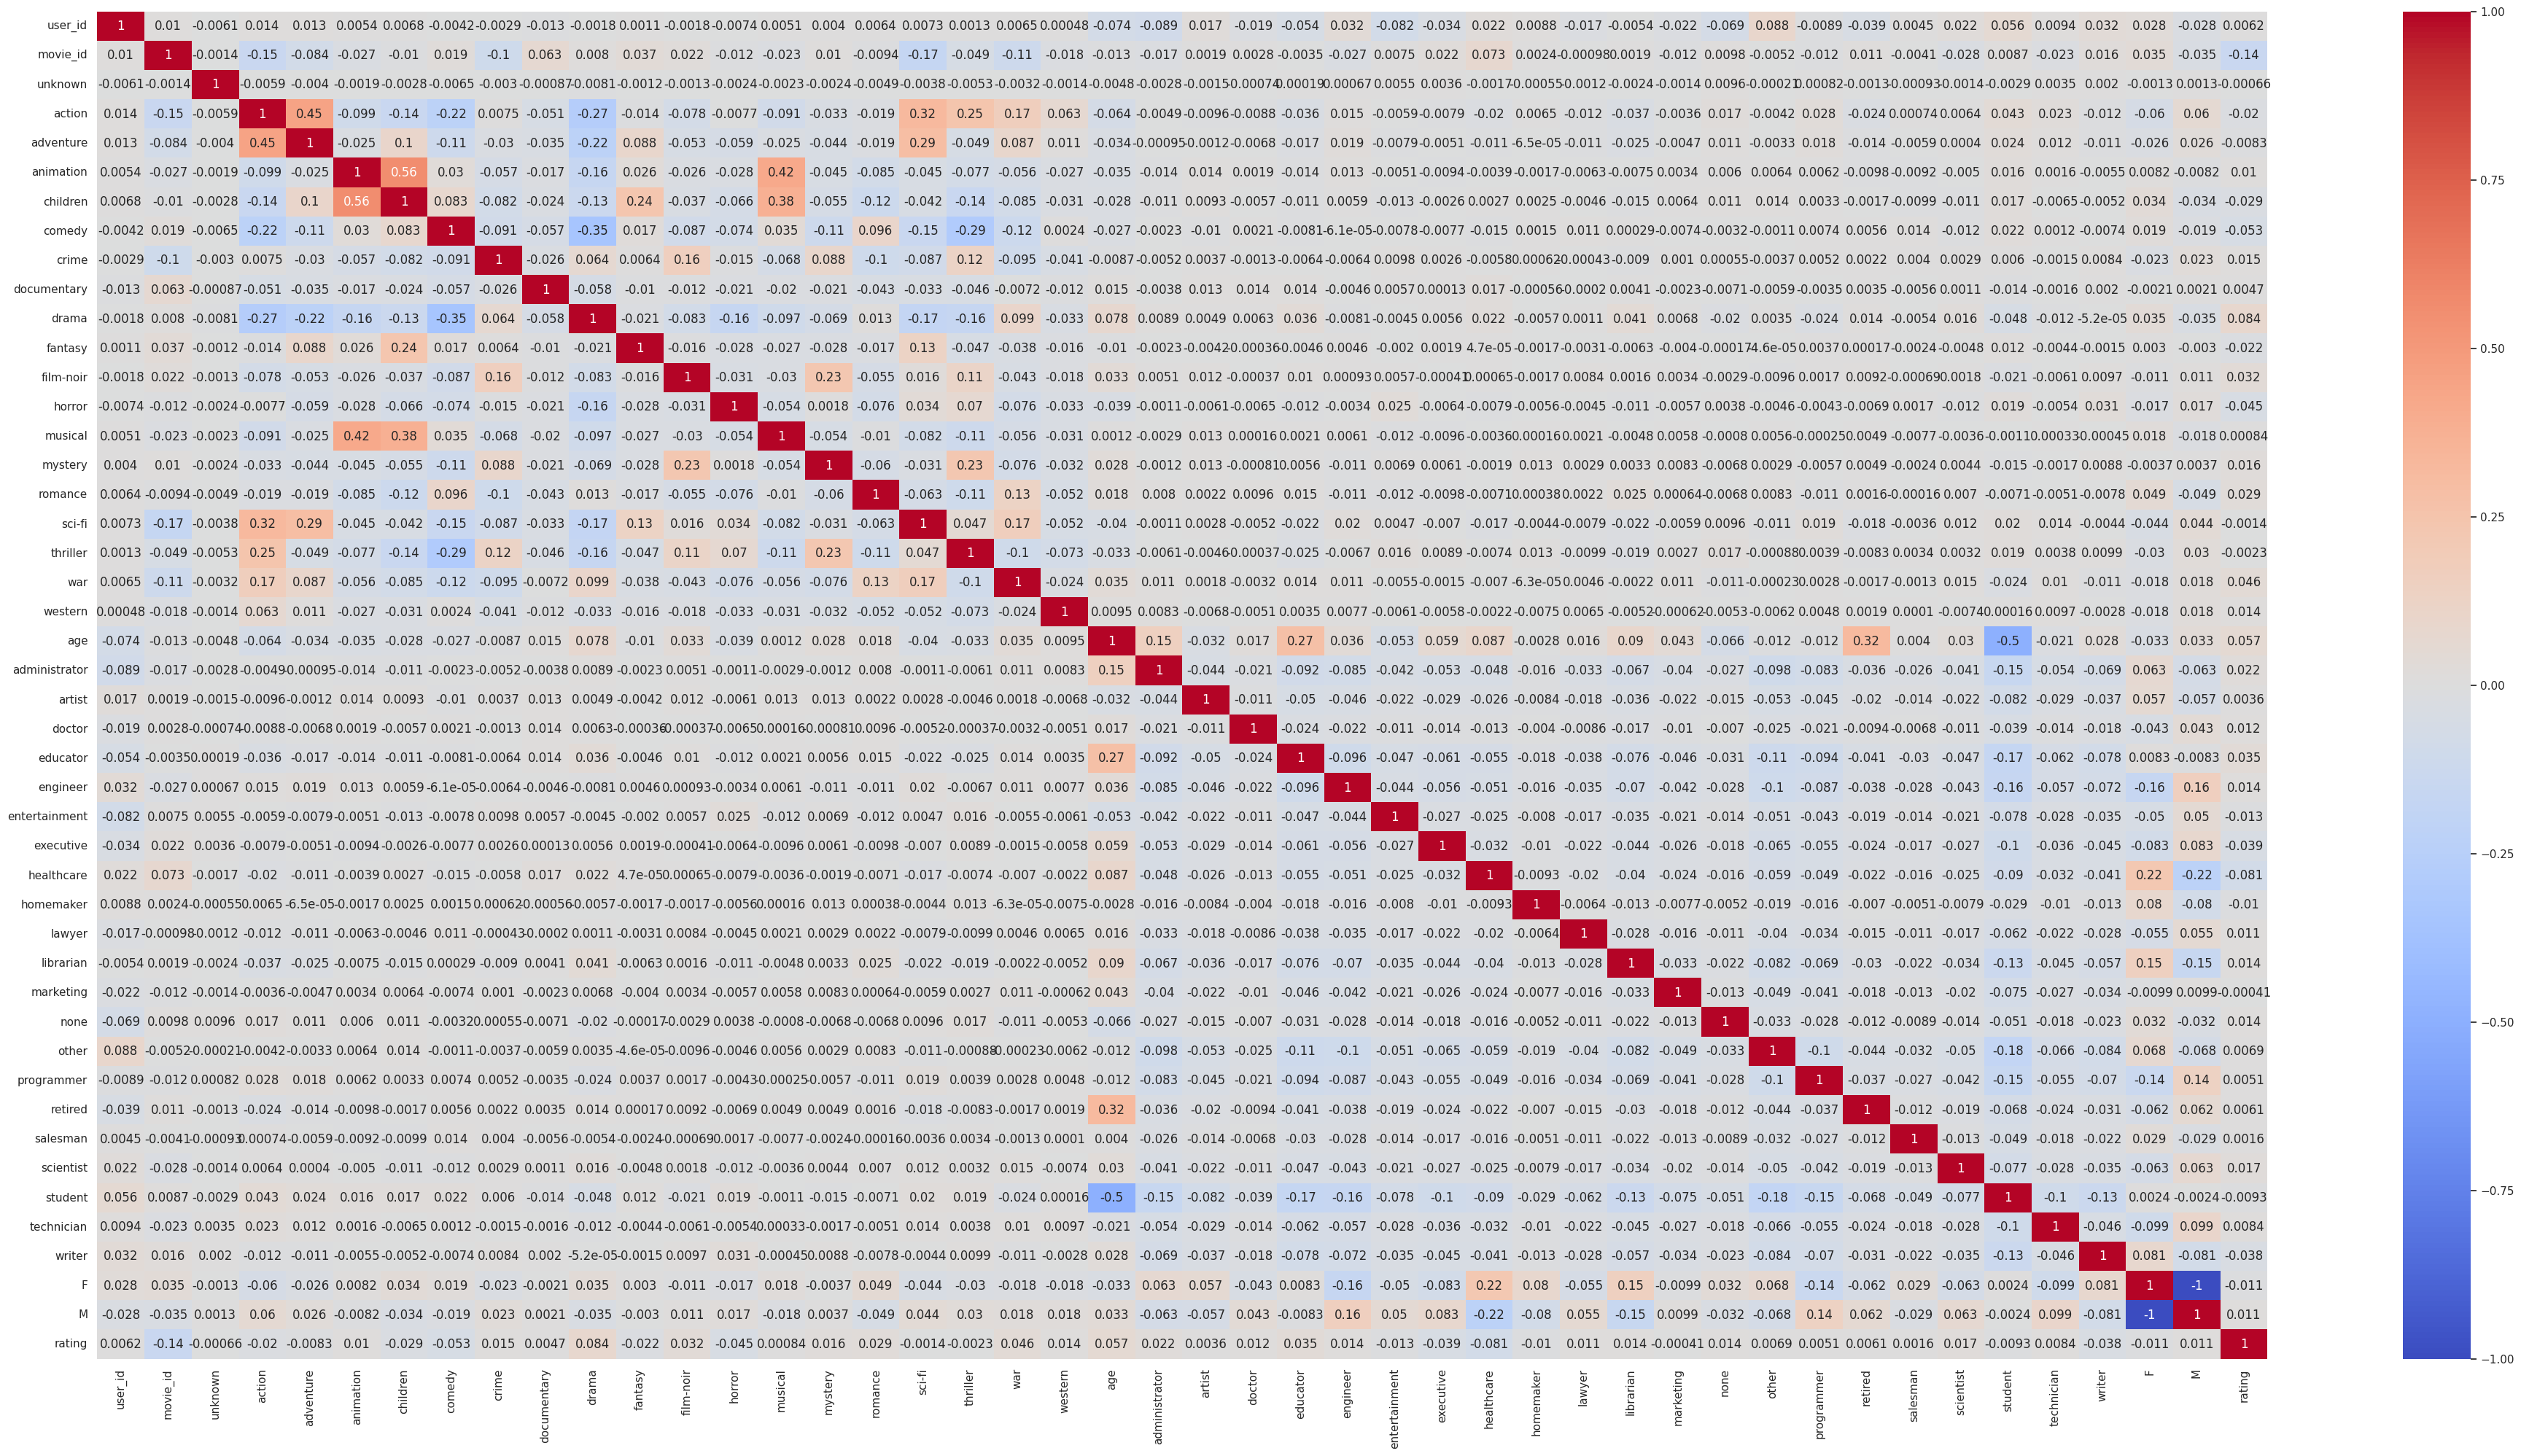

In [259]:
#@title Feature Selection

#Trasformazione variabili categoriche affinchè compaiano nella matrice di correlazione
le = LabelEncoder()
final_dataset['unknown'] = le.fit_transform(final_dataset['unknown'])
final_dataset['action'] = le.fit_transform(final_dataset['action'])
final_dataset['adventure'] = le.fit_transform(final_dataset['adventure'])
final_dataset['animation'] = le.fit_transform(final_dataset['animation'])
final_dataset['children'] = le.fit_transform(final_dataset['children'])
final_dataset['comedy'] = le.fit_transform(final_dataset['comedy'])
final_dataset['crime'] = le.fit_transform(final_dataset['crime'])
final_dataset['documentary'] = le.fit_transform(final_dataset['documentary'])
final_dataset['drama'] = le.fit_transform(final_dataset['drama'])
final_dataset['fantasy'] = le.fit_transform(final_dataset['fantasy'])
final_dataset['film-noir'] = le.fit_transform(final_dataset['film-noir'])
final_dataset['horror'] = le.fit_transform(final_dataset['horror'])
final_dataset['musical'] = le.fit_transform(final_dataset['musical'])
final_dataset['mystery'] = le.fit_transform(final_dataset['mystery'])
final_dataset['romance'] = le.fit_transform(final_dataset['romance'])
final_dataset['sci-fi'] = le.fit_transform(final_dataset['sci-fi'])
final_dataset['thriller'] = le.fit_transform(final_dataset['thriller'])
final_dataset['war'] = le.fit_transform(final_dataset['war'])
final_dataset['western'] = le.fit_transform(final_dataset['western'])

#Matrice correlazione feature
sns.set(rc = {'figure.figsize':(48,24)})
sns.heatmap(final_dataset.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')


In [260]:
# Calcola la correlazione tra le feature e la colonna del rating
correlation_matrix = final_dataset.corr()
rating_correlation = correlation_matrix['rating'].drop('rating').drop('movie_id').drop('user_id')  # Rimuovi la correlazione con se stessa

# Ordina le feature in base alla correlazione con il rating
sorted_features = rating_correlation.abs().sort_values(ascending=False)

# Stampa le feature ordinate per correlazione con il rating
print(sorted_features)


<ipython-input-260-bfe5b9e89ff8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = final_dataset.corr()


drama            0.083915
healthcare       0.080840
age              0.057271
comedy           0.052966
war              0.046359
horror           0.045483
executive        0.039378
writer           0.037685
educator         0.034889
film-noir        0.032470
romance          0.029448
children         0.028512
administrator    0.022354
fantasy          0.021812
action           0.019794
scientist        0.017199
mystery          0.016042
crime            0.015191
western          0.014460
engineer         0.014318
librarian        0.013515
none             0.013513
entertainment    0.012831
doctor           0.012356
lawyer           0.010996
M                0.010759
F                0.010759
animation        0.010050
homemaker        0.009999
student          0.009345
technician       0.008424
adventure        0.008331
other            0.006901
retired          0.006122
programmer       0.005067
documentary      0.004705
artist           0.003584
thriller         0.002279
salesman    

In [261]:
#adesso scartiamo le feature poco significative

final_dataset = final_dataset.drop('marketing',axis=1)
final_dataset = final_dataset.drop('unknown',axis=1)
final_dataset = final_dataset.drop('musical',axis=1)
final_dataset = final_dataset.drop('sci-fi',axis=1)
final_dataset = final_dataset.drop('salesman',axis=1)
final_dataset = final_dataset.drop('artist',axis=1)
final_dataset = final_dataset.drop('retired',axis=1)
final_dataset = final_dataset.drop('other',axis=1)
final_dataset = final_dataset.drop('adventure',axis=1)
final_dataset = final_dataset.drop('technician',axis=1)
final_dataset = final_dataset.drop('student',axis=1)
final_dataset = final_dataset.drop('homemaker',axis=1)
final_dataset = final_dataset.drop('animation',axis=1)
final_dataset = final_dataset.drop('F',axis=1)
final_dataset = final_dataset.drop('M',axis=1)
final_dataset = final_dataset.drop('lawyer',axis=1)
final_dataset = final_dataset.drop('programmer',axis=1)
final_dataset = final_dataset.drop('documentary',axis=1)
final_dataset = final_dataset.drop('thriller',axis=1)

final_dataset.head(10)



,user_id,movie_id,movie_title,action,children,comedy,crime,drama,fantasy,film-noir,...,educator,engineer,entertainment,executive,healthcare,librarian,none,scientist,writer,rating
0,196,242,Kolya (1996),0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,196,257,Men in Black (1997),1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,196,111,"Truth About Cats & Dogs, The (1996)",0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,196,25,"Birdcage, The (1996)",0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,196,382,"Adventures of Priscilla, Queen of the Desert, ...",0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
5,196,202,Groundhog Day (1993),0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
6,196,153,"Fish Called Wanda, A (1988)",0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
7,196,286,"English Patient, The (1996)",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
8,196,66,While You Were Sleeping (1995),0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
9,196,845,That Thing You Do! (1996),0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [262]:
#scelgo le 24 feature migliori

final_dataset = final_dataset.loc[~((final_dataset['drama'] == 0) & (final_dataset['comedy'] == 0) & (final_dataset['war'] == 0)
 & (final_dataset['horror'] == 0)  & (final_dataset['film-noir'] == 0) & (final_dataset['romance'] == 0)
  & (final_dataset['children'] == 0) & (final_dataset['fantasy'] == 0) & (final_dataset['action'] == 0)
  &  (final_dataset['mystery'] == 0) & (final_dataset['crime'] == 0) & (final_dataset['western'] == 0))
 ]


final_dataset = final_dataset.loc[~((final_dataset['healthcare'] == 0) & (final_dataset['age'] == 0) & (final_dataset['executive'] == 0)
 & (final_dataset['writer'] == 0)  & (final_dataset['educator'] == 0) & (final_dataset['administrator'] == 0)
  & (final_dataset['scientist'] == 0) & (final_dataset['engineer'] == 0) & (final_dataset['librarian'] == 0)
  & (final_dataset['doctor'] == 0) & (final_dataset['entertainment'] == 0) & (final_dataset['none'] == 0))]


final_dataset.head(100)

,user_id,movie_id,movie_title,action,children,comedy,crime,drama,fantasy,film-noir,...,educator,engineer,entertainment,executive,healthcare,librarian,none,scientist,writer,rating
0,196,242,Kolya (1996),0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,196,257,Men in Black (1997),1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,196,111,"Truth About Cats & Dogs, The (1996)",0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,196,25,"Birdcage, The (1996)",0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,196,382,"Adventures of Priscilla, Queen of the Desert, ...",0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,63,284,Tin Cup (1996),0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
99,63,13,Mighty Aphrodite (1995),0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
100,63,225,101 Dalmatians (1996),0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101,63,948,Booty Call (1997),0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [264]:
#adesso testiamo sul nuovo dataset
X = final_dataset.iloc[:,3:27]
print(X.columns)
y = final_dataset.iloc[:,27:]
print(y.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.20, random_state=0)

dtree = tree.DecisionTreeClassifier()
modello = dtree.fit(X_train.values, y_train)

for i in range(1, len(final_dataset)):
    movie = final_dataset.iloc[i, 2]
    if(movie == 'Raising Arizona (1987)'):
        movie_1_ind = final_dataset.iloc[i, 3:27]
    if(movie == 'Little Big League (1994)'):
        movie_2_ind = final_dataset.iloc[i, 3:27]
    if (movie == 'Mighty Aphrodite (1995)'):
        movie_3_ind = final_dataset.iloc[i, 3:27]
print("prediction for Raising Arizona (1987))")
predict = dtree.predict([movie_1_ind])
print(predict)
print("prediction for Dead Man Walking (1995)")
predict = dtree.predict([movie_2_ind])
print(predict)
print("prediction for Chasing Amy (1997)")
predict = dtree.predict([movie_3_ind])
print(predict)
print("\n")


score = cross_val_score(modello, X_train, y_train, cv = 10)
print("Cross validation: \n",score)
print("Testing score: {}".format(modello.score(X_test, y_test)))
print("\n")


predict = dtree.predict(X_test)
print('Accuracy modello: {0:0.4f}'.
format(accuracy_score(y_test, predict)))

cm = confusion_matrix(y_test, predict)
print('Confusion matrix\n\n', cm)

Index(['action', 'children', 'comedy', 'crime', 'drama', 'fantasy',
       'film-noir', 'horror', 'mystery', 'romance', 'war', 'western', 'age',
       'administrator', 'doctor', 'educator', 'engineer', 'entertainment',
       'executive', 'healthcare', 'librarian', 'none', 'scientist', 'writer'],
      dtype='object')
Index(['rating'], dtype='object')
prediction for Raising Arizona (1987))
[1]
prediction for Dead Man Walking (1995)
[1]
prediction for Chasing Amy (1997)
[1]


Cross validation: 
 [0.80678274 0.81068087 0.8114605  0.8114605  0.80987654 0.80870695
 0.81013645 0.81013645 0.80831709 0.81234568]
Testing score: 0.8067986901606112


Accuracy modello: 0.8068
Confusion matrix

 [[  482  2915]
 [  802 15040]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
